In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set()
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文标题 
plt.rcParams['axes.unicode_minus'] = False # 正常显示正负号 

In [2]:
df = pd.read_excel('D:/2018年数学建模练习B题附件.xls',index_col=0)
df.head()

,Flow（L/s),P2
Local(China Standard Time),,
2014-04-15 00:00:00,48.89,36.98
2014-04-15 00:15:00,37.78,29.88
2014-04-15 00:30:00,34.44,29.04
2014-04-15 00:45:00,33.33,29.96
2014-04-15 01:00:00,33.33,30.96


from sympy import *
t = Symbol('t')
x = Symbol('x')
m = integrate(sin(t)/(pi-t),(t,0,x))
n = integrate(m,(x,0,pi))

In [3]:
df_new = df.copy(0)

In [4]:
x = df_new.loc['2014-04-15 02:00:00':'2014-04-15 05:00:00',:][['Flow（L/s)',' P2']]

In [5]:
list(x.groupby('Flow（L/s)'))[0][0]

32.22

## 求PRE

In [6]:
df_new['M'] = 0

In [7]:
df_new['Q_min'] = 0

In [8]:
df_new['Pre'] = 0

In [9]:
def Pre(P):
    r = 0
    Q_MIN = []
    P2_MIN = []
    for i in range(4,7):
        if(i==4):
            for j in range(15, 31):
                dts = '2014-'+str(i)+'-'+str(j) + ' 02:00:00'
                dte = '2014-'+str(i)+'-'+str(j) + ' 05:00:00'
                x = df_new.loc[dts:dte,:]
                Pm = list(x.groupby('Flow（L/s)'))[0][1][' P2'].mean() # 最小流量对应的P2均值
                Qm = list(x.groupby('Flow（L/s)'))[0][0]  # 当天夜间最小流量
                Q_MIN.append(Qm)
                P2_MIN.append(Pm)
                df_new.loc['2014-'+str(i)+'-'+str(j):'2014-'+str(i)+'-'+str(j), 'Q_min'] = Qm
                df_new.loc['2014-'+str(i)+'-'+str(j):'2014-'+str(i)+'-'+str(j), 'M'] = Pm
                df_new.loc['2014-'+str(i)+'-'+str(j):'2014-'+str(i)+'-'+str(j), 'Pre']  = Qm * (df_new.loc['2014-'+str(i)+'-'+str(j):'2014-'+str(i)+'-'+str(j), ' P2'] / Pm)**P      
                r += 1
        elif(i==5):
            for j in range(1, 32):
                dts = '2014-'+str(i)+'-'+str(j) + ' 02:00:00'
                dte = '2014-'+str(i)+'-'+str(j) + ' 05:00:00'
                x = df_new.loc[dts:dte,:]
                Pm = list(x.groupby('Flow（L/s)'))[0][1][' P2'].mean()
                Qm = list(x.groupby('Flow（L/s)'))[0][0]
                P2_MIN.append(Pm)
                Q_MIN.append(Qm)
                df_new.loc['2014-'+str(i)+'-'+str(j):'2014-'+str(i)+'-'+str(j), 'Q_min'] = Qm
                df_new.loc['2014-'+str(i)+'-'+str(j):'2014-'+str(i)+'-'+str(j), 'M'] = Pm
                df_new.loc['2014-'+str(i)+'-'+str(j):'2014-'+str(i)+'-'+str(j), 'Pre']  = Qm * (df_new.loc['2014-'+str(i)+'-'+str(j):'2014-'+str(i)+'-'+str(j), ' P2'] / Pm)**P       
                r += 1
        elif(i==6):
            for j in range(1, 13):
                dts = '2014-'+str(i)+'-'+str(j) + ' 02:00:00'
                dte = '2014-'+str(i)+'-'+str(j) + ' 05:00:00'
                x = df_new.loc[dts:dte,:]
                Pm = list(x.groupby('Flow（L/s)'))[0][1][' P2'].mean()
                Qm = list(x.groupby('Flow（L/s)'))[0][0]
                Q_MIN.append(Qm)
                P2_MIN.append(Pm)
                df_new.loc['2014-'+str(i)+'-'+str(j):'2014-'+str(i)+'-'+str(j), 'Q_min'] = Qm
                df_new.loc['2014-'+str(i)+'-'+str(j):'2014-'+str(i)+'-'+str(j), 'M'] = Pm
                df_new.loc['2014-'+str(i)+'-'+str(j):'2014-'+str(i)+'-'+str(j), 'Pre']  = Qm * (df_new.loc['2014-'+str(i)+'-'+str(j):'2014-'+str(i)+'-'+str(j), ' P2'] / Pm)**P
                r += 1
    return Q_MIN, P2_MIN

In [10]:
Q_MIN, P2_MIN = Pre(1.18)

## 晓敏的5个走势图

In [11]:
date_list_new = pd.date_range('2014-04-15', periods=59)

In [12]:
Q_P_df = DataFrame(index=date_list_new, data=Q_MIN,columns=['夜间最小流量'])

In [13]:
Q_P_df['夜间最小流量对应的P2均值'] = P2_MIN

In [15]:
Q_P_df.to_excel('夜间最小流量.xls')

PermissionError: [Errno 13] Permission denied: '夜间最小流量.xls'

No handles with labels found to put in legend.


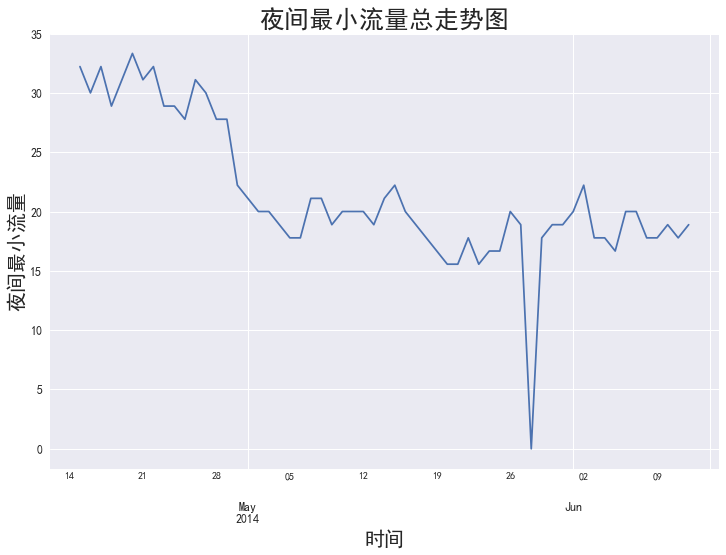

In [16]:
plt.figure(figsize=(12,8))
plt.title('夜间最小流量总走势图',fontsize=25)
plt.ylabel('夜间最小流量',fontsize=20)
plt.xlabel('时间',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
Q_P_df['夜间最小流量'].plot()
plt.savefig('夜间最小流量总走势图.png',dpi=200)

No handles with labels found to put in legend.


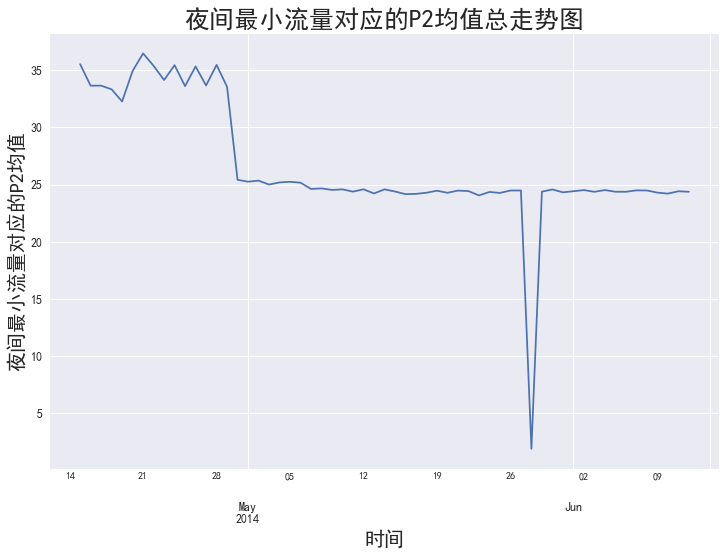

In [17]:
plt.figure(figsize=(12,8))
plt.title('夜间最小流量对应的P2均值总走势图',fontsize=25)
plt.ylabel('夜间最小流量对应的P2均值',fontsize=20)
plt.xlabel('时间',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
Q_P_df['夜间最小流量对应的P2均值'].plot()
plt.savefig('夜间最小流量对应的P2均值总走势图.png',dpi=200)

In [18]:
df_new.head()

,Flow（L/s),P2,M,Q_min,Pre
Local(China Standard Time),,,,,
2014-04-15 00:00:00,48.89,36.98,35.523333,32.22,33.784719
2014-04-15 00:15:00,37.78,29.88,35.523333,32.22,26.270507
2014-04-15 00:30:00,34.44,29.04,35.523333,32.22,25.401266
2014-04-15 00:45:00,33.33,29.96,35.523333,32.22,26.353524
2014-04-15 01:00:00,33.33,30.96,35.523333,32.22,27.394570


In [19]:
df_new.loc['2014/4':'2014/4','Pre'].resample('d').mean()

Local(China Standard Time)
2014-04-15    30.998540
2014-04-16    31.066430
2014-04-17    33.097584
2014-04-18    29.652874
2014-04-19    32.978501
2014-04-20    32.757922
2014-04-21    29.636092
2014-04-22    31.123445
2014-04-23    29.005838
2014-04-24    28.038737
2014-04-25    28.498806
2014-04-26    30.086966
2014-04-27    30.583988
2014-04-28    26.869708
2014-04-29    28.489071
2014-04-30    30.044552
Freq: D, Name: Pre, dtype: float64

No handles with labels found to put in legend.


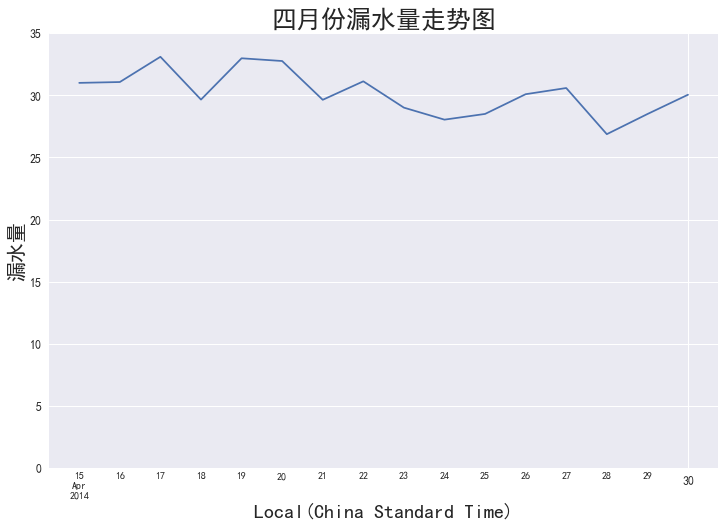

In [20]:
dta1 = df_new.loc['2014/4':'2014/4','Pre'].resample('d').mean()
plt.figure(figsize=(12,8))
plt.title('四月份漏水量走势图',fontsize=25)
plt.ylabel('漏水量',fontsize=20)
plt.xlabel('时间',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,35) # 修改y轴范围
plt.legend()
dta1.plot()
plt.savefig('4.png',dpi=200)

No handles with labels found to put in legend.


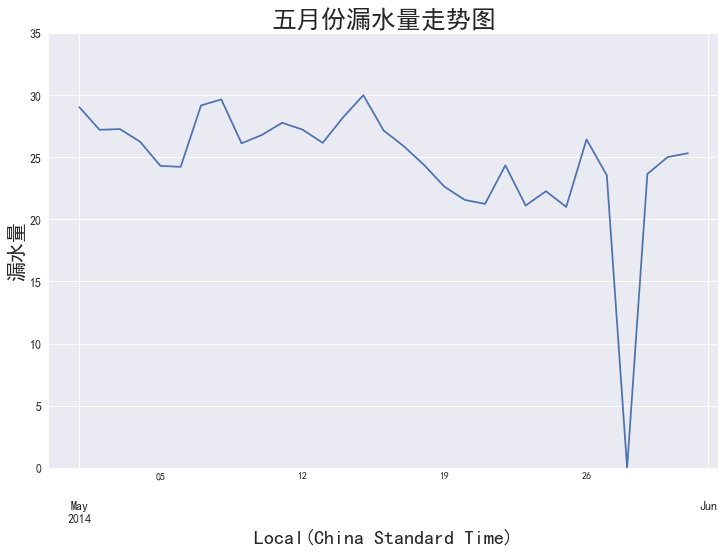

In [21]:
dta1 = df_new.loc['2014/5':'2014/5','Pre'].resample('d').mean()
plt.figure(figsize=(12,8))
plt.title('五月份漏水量走势图',fontsize=25)
plt.ylabel('漏水量',fontsize=20)
plt.xlabel('时间',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,35) # 修改y轴范围
plt.legend()
dta1.plot()
plt.savefig('5.png',dpi=200)

No handles with labels found to put in legend.


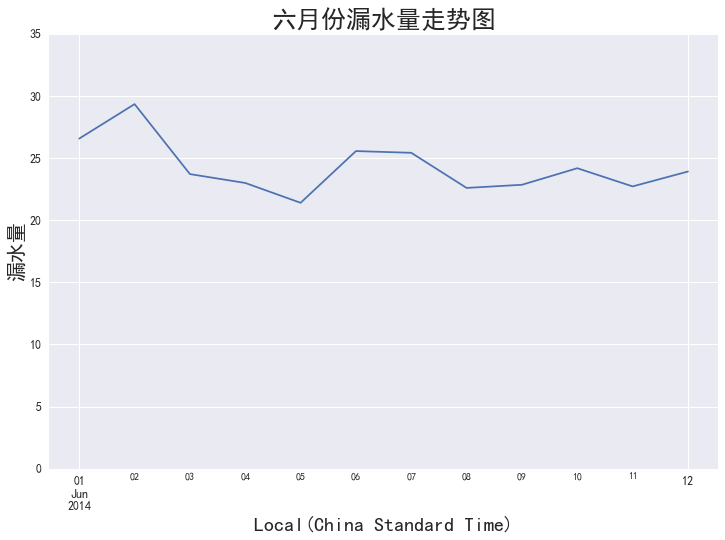

In [22]:
dta1 = df_new.loc['2014/6':'2014/6','Pre'].resample('d').mean()
plt.figure(figsize=(12,8))
plt.title('六月份漏水量走势图',fontsize=25)
plt.ylabel('漏水量',fontsize=20)
plt.xlabel('时间',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,35) # 修改y轴范围
plt.legend()
dta1.plot()
plt.savefig('6.png',dpi=200)

In [23]:
df_new.to_excel('123.xls')

In [122]:
df_new = pd.read_excel('D:/2018年数学建模练习B题附件.xls')

In [123]:
df_new.head()

,Local(China Standard Time),Flow（L/s),P2
0,2014-04-15 00:00:00,48.89,36.98
1,2014-04-15 00:15:00,37.78,29.88
2,2014-04-15 00:30:00,34.44,29.04
3,2014-04-15 00:45:00,33.33,29.96
4,2014-04-15 01:00:00,33.33,30.96


In [124]:
df_new.describe()

,Flow（L/s),P2
count,5657.000000,5657.000000
mean,46.650062,32.010490
std,14.641343,4.314994
min,0.000000,1.560000
25%,37.780000,31.360000
50%,50.000000,33.470000
75%,56.670000,34.850000
max,137.780000,38.200000


## 删除Flow异常值

In [125]:
des = df_new.describe()

In [126]:
print("上界"+"\t\t下界")
Shang = []
Xia = []
for i in range(1):
    Q1 = des.iloc[4,i]
    Q2 = des.iloc[5,i]
    Q3 = des.iloc[6,i]
    cha = Q3 - Q1
    shang = Q2 + 1.5*cha
    xia = Q2 - 1.5*cha
    Shang.append(shang)
    Xia.append(xia)
    print(str(shang), end="\t\t")
    print(xia)

上界		下界
78.33500000000001		21.665


In [127]:
df_new.shape,Shang[0],Xia[0],df_new.iloc[0,1]

((5657, 3), 78.33500000000001, 21.665, 48.89)

### 要删除的行

In [128]:
dellist = []
for i in range(5657):
    now = df_new.iloc[i,1]
    if now>Shang[0] or now<Xia[0]:
        dellist.append(i)
print(dellist)

[1552, 1553, 1554, 1555, 1557, 1638, 1639, 1640, 1641, 1652, 1653, 1654, 1655, 1735, 1737, 1738, 1739, 1747, 1748, 1749, 1750, 1830, 1832, 1833, 1834, 1841, 1842, 1843, 1844, 1845, 1846, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2128, 2129, 2133, 2227, 2228, 2230, 2310, 2311, 2312, 2313, 2314, 2315, 2316, 2317, 2322, 2323, 2324, 2326, 2327, 2406, 2408, 2409, 2410, 2414, 2415, 2416, 2417, 2418, 2419, 2420, 2421, 2422, 2423, 2503, 2514, 2516, 2517, 2518, 2597, 2598, 2601, 2602, 2603, 2606, 2609, 2610, 2611, 2612, 2613, 2614, 2695, 2696, 2697, 2699, 2700, 2705, 2707, 2709, 2710, 2801, 2803, 2804, 2805, 2806, 2983, 2984, 2987, 2988, 2992, 2993, 2994, 3082, 3083, 3084, 3085, 3090, 3091, 3092, 3093, 3094, 3095, 3173, 3174, 3175, 3176, 3177, 3178, 3180, 3181, 3182, 3183, 3184, 3185, 3186, 3187, 3188, 3189, 3190, 3191, 3192, 326

## 找出异常值

In [31]:
df_new = df_new.drop(dellist)

In [32]:
dt = df.index

## 删除异常值的Flow图

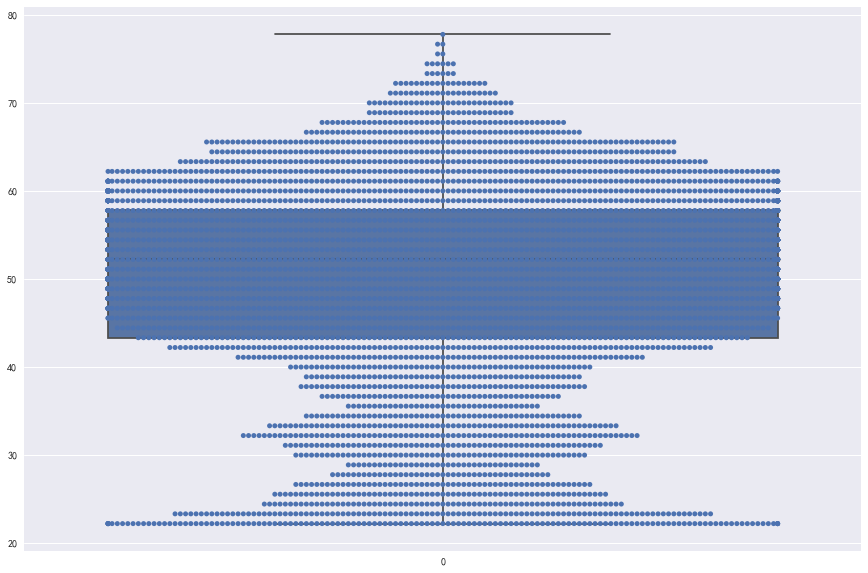

In [33]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=df_new['Flow（L/s)'])
x = sns.swarmplot(data=df_new['Flow（L/s)'])

In [34]:
df_new.index = df_new['Local(China Standard Time)']

## 删除异常值后的Flow时序图

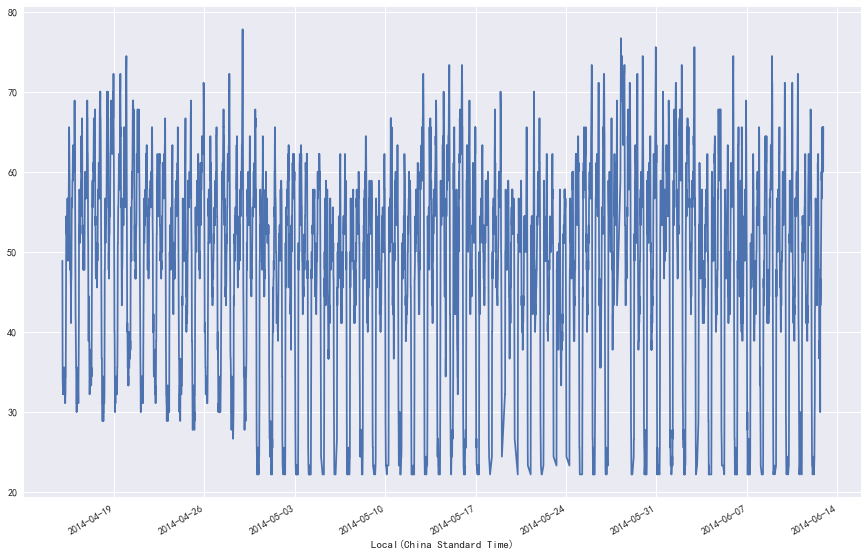

In [35]:
plt.figure(figsize=(15,10))
df_new['Flow（L/s)'].plot()

## 删除异常值后的Flow做差分

## 不做差分的检验结果

In [36]:
from statsmodels.tsa.stattools import adfuller
print('原始序列的检验结果为：',adfuller(df_new['Flow（L/s)']))

原始序列的检验结果为： (-11.925027280206324, 4.93002959885566e-22, 33, 5103, {'1%': -3.4316321070915023, '5%': -2.8621065552117604, '10%': -2.567071577593673}, 26648.557705058345)


In [37]:
df_new['Flow（L/s)']

Local(China Standard Time)
2014-04-15 00:00:00    48.89
2014-04-15 00:15:00    37.78
2014-04-15 00:30:00    34.44
2014-04-15 00:45:00    33.33
2014-04-15 01:00:00    33.33
2014-04-15 01:15:00    32.22
2014-04-15 01:30:00    32.22
2014-04-15 01:45:00    33.33
2014-04-15 02:00:00    32.22
2014-04-15 02:15:00    34.44
2014-04-15 02:30:00    35.56
2014-04-15 02:45:00    34.44
2014-04-15 03:00:00    34.44
2014-04-15 03:15:00    33.33
2014-04-15 03:30:00    35.56
2014-04-15 03:45:00    33.33
2014-04-15 04:00:00    32.22
2014-04-15 04:15:00    33.33
2014-04-15 04:30:00    33.33
2014-04-15 04:45:00    32.22
2014-04-15 05:00:00    33.33
2014-04-15 05:15:00    31.11
2014-04-15 05:30:00    32.22
2014-04-15 05:45:00    32.22
2014-04-15 06:00:00    34.44
2014-04-15 06:15:00    34.44
2014-04-15 06:30:00    38.89
2014-04-15 06:45:00    45.56
2014-04-15 07:00:00    48.89
2014-04-15 07:15:00    54.44
                       ...  
2014-06-12 14:45:00    38.89
2014-06-12 15:00:00    37.78
2014-06-12 15:15

## 一阶差分

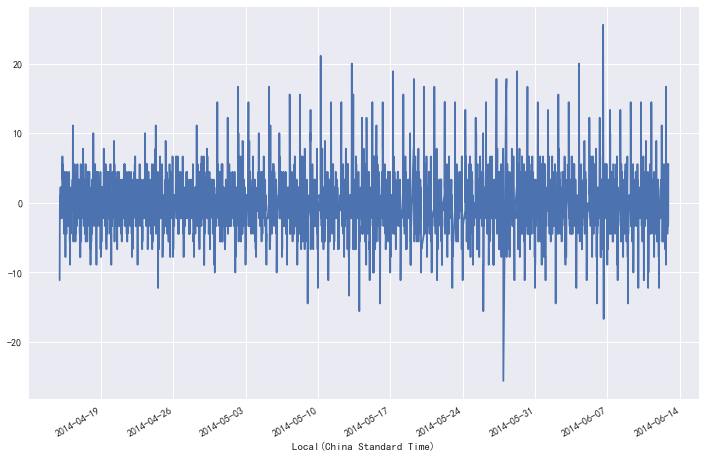

In [38]:
fig = plt.figure(figsize=(12,8)) 
ax1= fig.add_subplot(111) 
diff1 = df_new['Flow（L/s)'].diff(1) 
diff1.plot(ax=ax1)

## 一阶差分后的检验结果

In [39]:
from statsmodels.tsa.stattools import adfuller
adfuller(diff1.dropna())

(-23.71671108545476,
 0.0,
 33,
 5102,
 {'1%': -3.431632358513106,
  '5%': -2.862106666289463,
  '10%': -2.567071636724501},
 26766.211494381874)

## 二阶差分

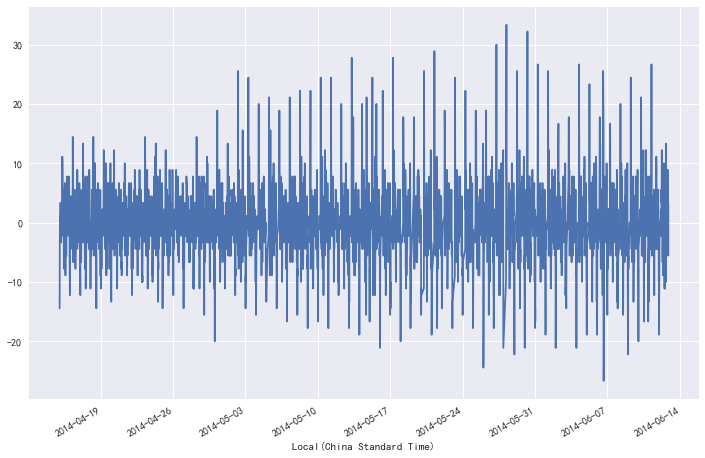

In [40]:
fig = plt.figure(figsize=(12,8)) 
ax2= fig.add_subplot(111) 
diff2 = df_new['Flow（L/s)'].diff(2) 
diff2.plot(ax=ax2)

## 二阶差分的检验结果

In [41]:
adfuller(diff2.dropna())

(-24.04061411063606,
 0.0,
 33,
 5101,
 {'1%': -3.4316326100333367,
  '5%': -2.86210677741073,
  '10%': -2.5670716958785214},
 26882.845995520394)

## 晓敏  求ILI

In [42]:
df_new = pd.read_excel('D:/2018年数学建模练习B题附件.xls',index_col=[0])

In [43]:
df_new.head()

,Flow（L/s),P2
Local(China Standard Time),,
2014-04-15 00:00:00,48.89,36.98
2014-04-15 00:15:00,37.78,29.88
2014-04-15 00:30:00,34.44,29.04
2014-04-15 00:45:00,33.33,29.96
2014-04-15 01:00:00,33.33,30.96


In [44]:
now_df = pd.read_excel('123.xls',index_col=0)
now_df.head()

,Flow（L/s),P2,M,Q_min,Pre
Local(China Standard Time),,,,,
2014-04-15 00:00:00,48.89,36.98,35.523333,32.22,33.784719
2014-04-15 00:15:00,37.78,29.88,35.523333,32.22,26.270507
2014-04-15 00:30:00,34.44,29.04,35.523333,32.22,25.401266
2014-04-15 00:45:00,33.33,29.96,35.523333,32.22,26.353524
2014-04-15 01:00:00,33.33,30.96,35.523333,32.22,27.394570


### 对P2进行分箱

In [45]:
bins = [0,10,20,30,40]
now_df['categories'] = pd.cut(now_df[' P2'], bins, labels=['1','2','3','4'])

In [46]:
g = list(now_df.groupby('categories'))

In [47]:
P2_mean = []
lost_mean = []
for i, d in g:
    m = d[' P2'].mean()
    l =d['Pre'].mean()
    P2_mean.append(m)
    lost_mean.append(l)

In [48]:
P2_mean

[3.7487500000000007, 12.774, 25.07571681415927, 33.924842152067484]

In [49]:
lost_mean

[0.7602107358782768, 6.2539700046793865, 19.31619834564311, 27.945900414093074]

In [50]:
P2_mean = np.array(P2_mean)
lost_mean = np.array(lost_mean)

In [51]:
CARL =lost_mean*3.6*24*1000 / ( 60000 * 0.9)

In [52]:
CARL

array([ 1.21633718, 10.00635201, 30.90591735, 44.71344066])

In [53]:
UARL = (18 * 1500 + 0.8 * 60000 + 25 * (6/1000)*60000) * P2_mean / 60000

In [54]:
UARL

array([ 5.24825   , 17.8836    , 35.10600354, 47.49477901])

In [55]:
ILI = CARL / UARL

In [56]:
ILI

array([0.23176053, 0.55952672, 0.88035989, 0.94143907])

## 求Sub

In [57]:
dd_new  = df.copy()

In [58]:
del dd_new[' P2']

In [59]:
dd_new.head()

,Flow（L/s)
Local(China Standard Time),
2014-04-15 00:00:00,48.89
2014-04-15 00:15:00,37.78
2014-04-15 00:30:00,34.44
2014-04-15 00:45:00,33.33
2014-04-15 01:00:00,33.33


In [60]:
for i in range(4,7):
    if(i==4):
        for j in range(15, 31):
            dts = '2014-'+str(i)+'-'+str(j)
            x = dd_new.loc[dts:dts,'Flow（L/s)']
            D_m = x.min()
            dd_new.loc[dts:dts,'D_min'] = D_m
    elif(i==5):
        for j in range(1, 32):
            dts = '2014-'+str(i)+'-'+str(j)
            x = dd_new.loc[dts:dts,'Flow（L/s)']
            D_m = x.min()
            dd_new.loc[dts:dts,'D_min'] = D_m
    elif(i==6):
        for j in range(1, 13):
            dts = '2014-'+str(i)+'-'+str(j)
            x = dd_new.loc[dts:dts,'Flow（L/s)']
            D_m = x.min()
            dd_new.loc[dts:dts,'D_min'] = D_m

In [61]:
dd_new['Sub'] = dd_new['Flow（L/s)'] - dd_new['D_min']

In [62]:
dd_new

,Flow（L/s),D_min,Sub
Local(China Standard Time),,,
2014-04-15 00:00:00,48.89,31.11,17.78
2014-04-15 00:15:00,37.78,31.11,6.67
2014-04-15 00:30:00,34.44,31.11,3.33
2014-04-15 00:45:00,33.33,31.11,2.22
2014-04-15 01:00:00,33.33,31.11,2.22
2014-04-15 01:15:00,32.22,31.11,1.11
2014-04-15 01:30:00,32.22,31.11,1.11
2014-04-15 01:45:00,33.33,31.11,2.22
2014-04-15 02:00:00,32.22,31.11,1.11


## Sub差分

In [63]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.graphics.tsaplots import acf,pacf,plot_acf,plot_pacf 
from statsmodels.tsa.arima_model import ARMA 
from statsmodels.graphics.api import qqplot

In [64]:
dta = dd_new['Sub']

In [65]:
dta.head()

Local(China Standard Time)
2014-04-15 00:00:00    17.78
2014-04-15 00:15:00     6.67
2014-04-15 00:30:00     3.33
2014-04-15 00:45:00     2.22
2014-04-15 01:00:00     2.22
Name: Sub, dtype: float64

## 一阶差分

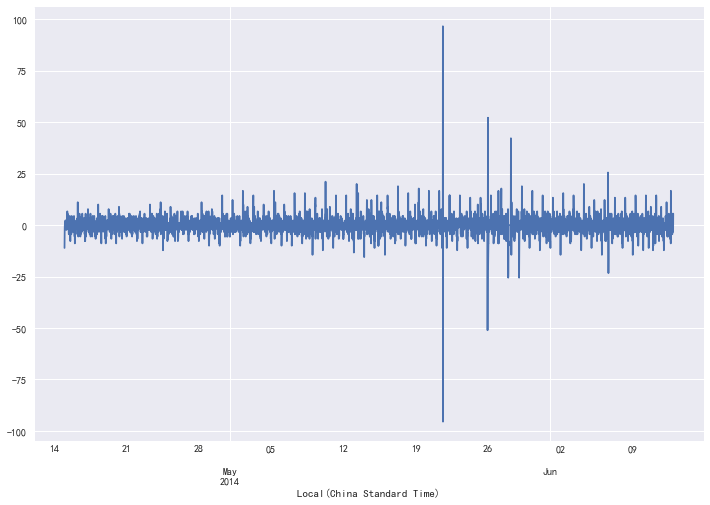

In [66]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
diff1 = dta.diff(1)
diff1.plot(ax=ax1)

In [67]:
adfuller(diff1.dropna())

(-25.41042629337588,
 0.0,
 30,
 5625,
 {'1%': -3.4315130731890227,
  '5%': -2.8620539651513908,
  '10%': -2.567043582111605},
 31467.867086679405)

## 二阶差分

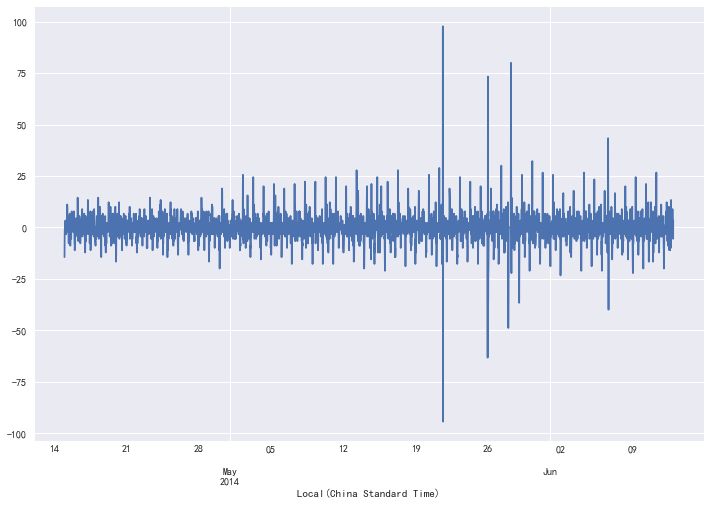

In [68]:
fig = plt.figure(figsize=(12,8))
ax2 = fig.add_subplot(111)
diff2 = dta.diff(2)
diff2.plot(ax=ax2)

In [69]:
adfuller(diff2.dropna())

(-22.477968675747288,
 0.0,
 33,
 5621,
 {'1%': -3.4315139012302827,
  '5%': -2.8620543309934208,
  '10%': -2.5670437768605487},
 31619.284780197195)

## 平稳时间序列 和 自相关图 和 偏自相关图

### 上图是acf图
### 下图是pacf图

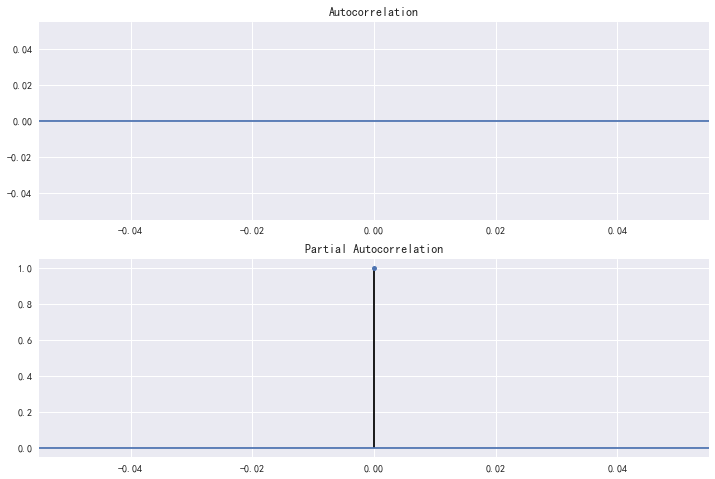

In [70]:
dta1 = dta.diff(1) # 使用一阶差分
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta1, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta1, lags=40, ax=ax2)

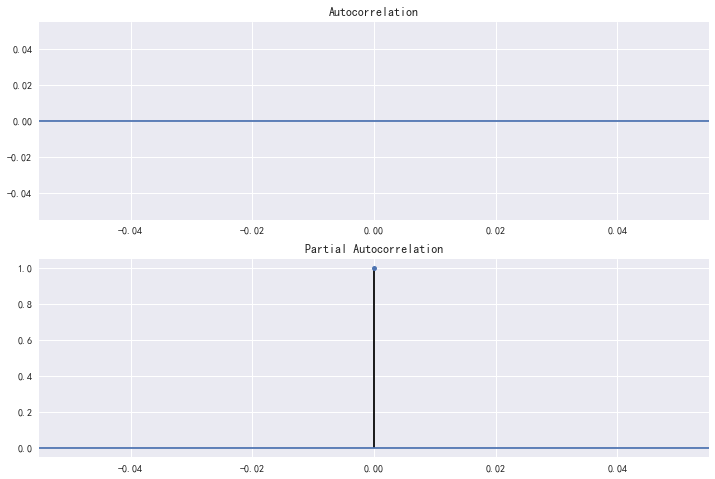

In [71]:
dta2 = dta.diff(2) # 使用二阶差分
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta2, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta2, lags=40, ax=ax2)

## 使用Flow

In [72]:
dta = dd_new['Flow（L/s)']

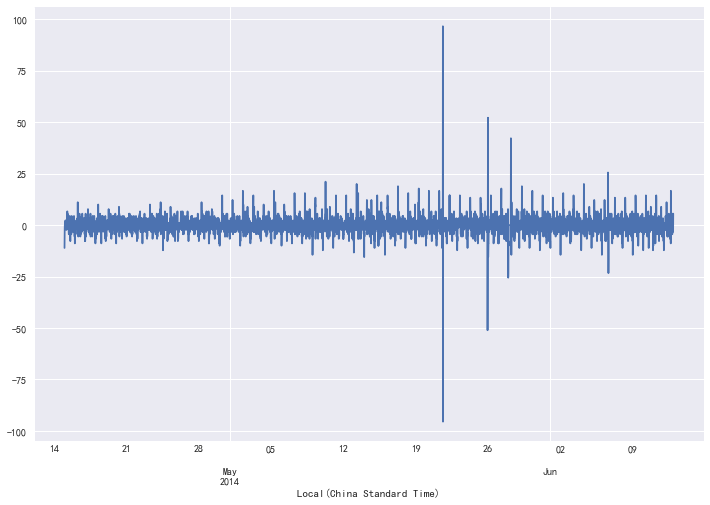

In [73]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
diff1 = dta.diff(1)
diff1.plot(ax=ax1)

In [74]:
adfuller(diff1.dropna())

(-25.562291743504,
 0.0,
 30,
 5625,
 {'1%': -3.4315130731890227,
  '5%': -2.8620539651513908,
  '10%': -2.567043582111605},
 31354.825318154035)

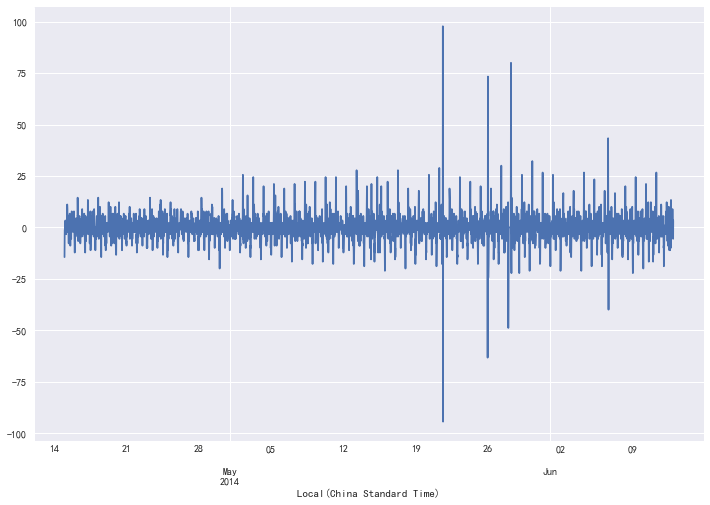

In [75]:
fig = plt.figure(figsize=(12,8))
ax2 = fig.add_subplot(111)
diff2 = dta.diff(2)
diff2.plot(ax=ax2)

In [76]:
adfuller(diff2.dropna())

(-22.715179592907493,
 0.0,
 33,
 5621,
 {'1%': -3.4315139012302827,
  '5%': -2.8620543309934208,
  '10%': -2.5670437768605487},
 31503.11283163562)

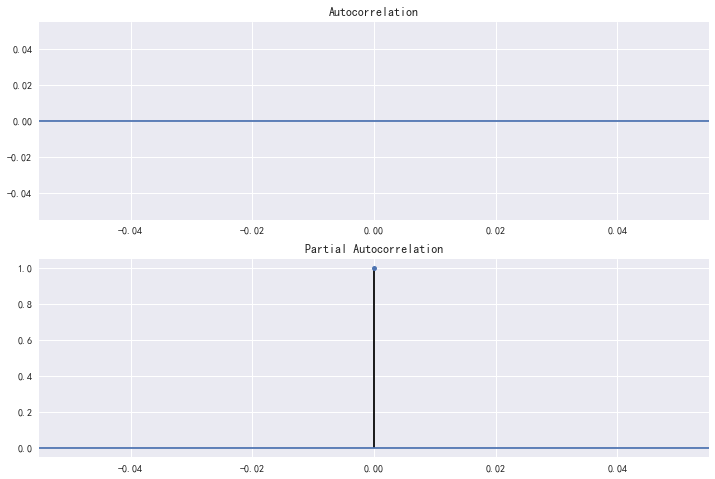

In [77]:
dta1 = dta.diff(1) # 使用一阶差分
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta1, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta1, lags=40, ax=ax2)

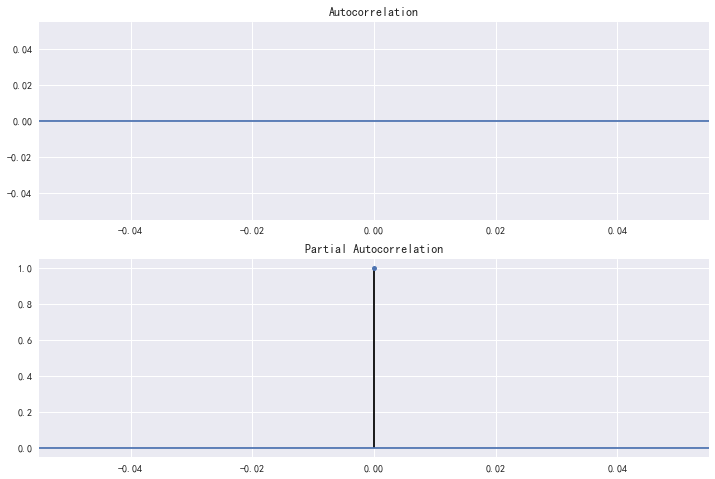

In [78]:
dta2 = dta.diff(2) # 使用二阶差分
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta2, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta2, lags=40, ax=ax2)

## Flow每天均值试做

In [79]:
dta = dd_new['Flow（L/s)'].resample('d').mean()

(-11.521975927943087,
 4.019604691317022e-21,
 0,
 57,
 {'1%': -3.5506699942762414,
  '5%': -2.913766394626147,
  '10%': -2.5946240473991997},
 210.66025793859075)

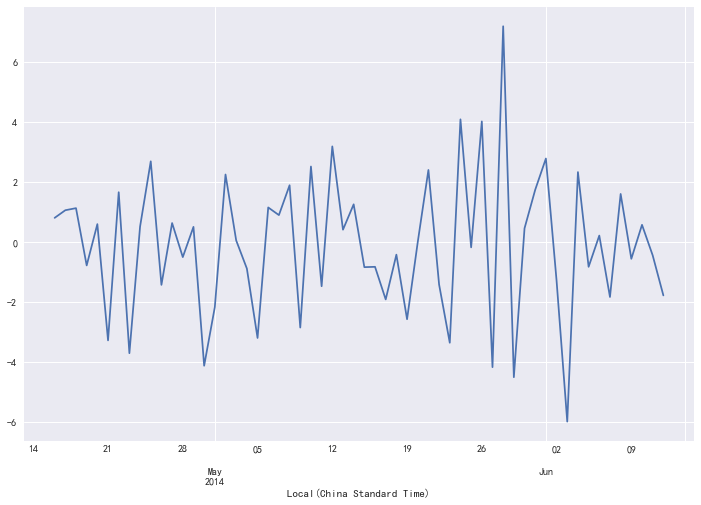

In [80]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
diff1 = dta.diff(1)
diff1.plot(ax=ax1)
adfuller(diff1.dropna())

(-3.8651611608570935,
 0.0023067395088432158,
 2,
 54,
 {'1%': -3.55770911573439,
  '5%': -2.9167703434435808,
  '10%': -2.59622219478738},
 208.95411472634547)

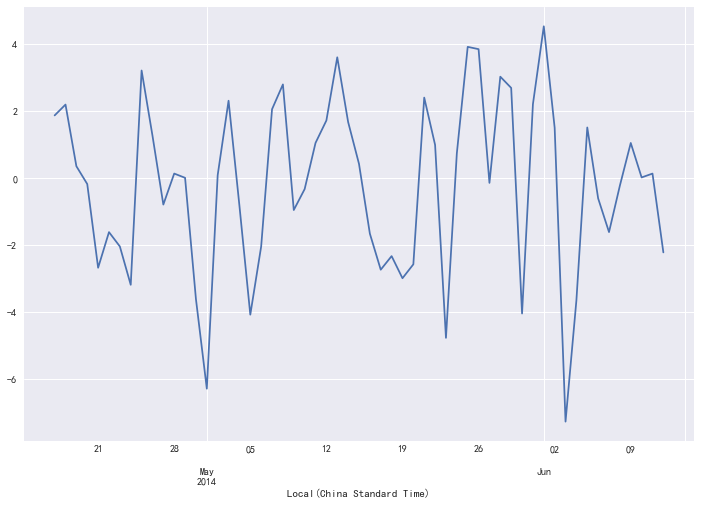

In [81]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
diff2 = dta.diff(2)
diff2.plot(ax=ax1)
adfuller(diff2.dropna())

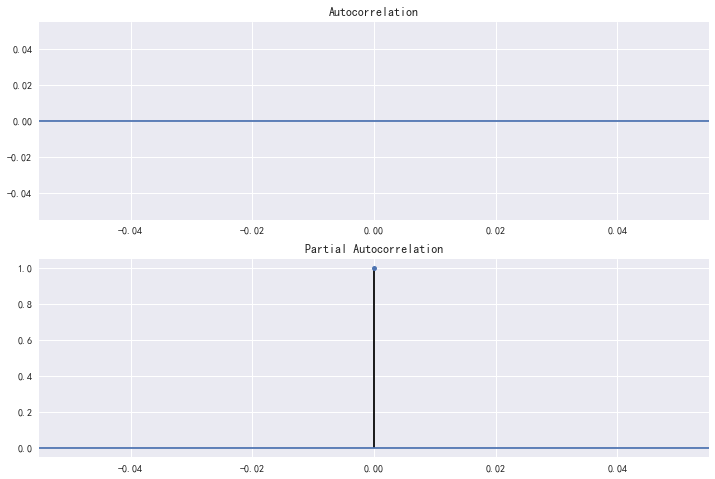

In [82]:
dta1 = dta.diff(1) # 使用一阶差分
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta1, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta1, lags=40, ax=ax2)

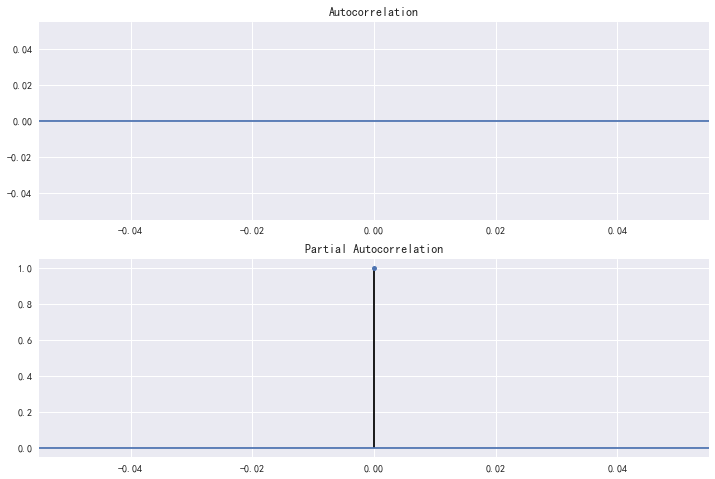

In [83]:
dta1 = dta.diff(2) # 使用一阶差分
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta1, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta1, lags=40, ax=ax2)

## 不做差分

In [84]:
dta = dd_new['Flow（L/s)']

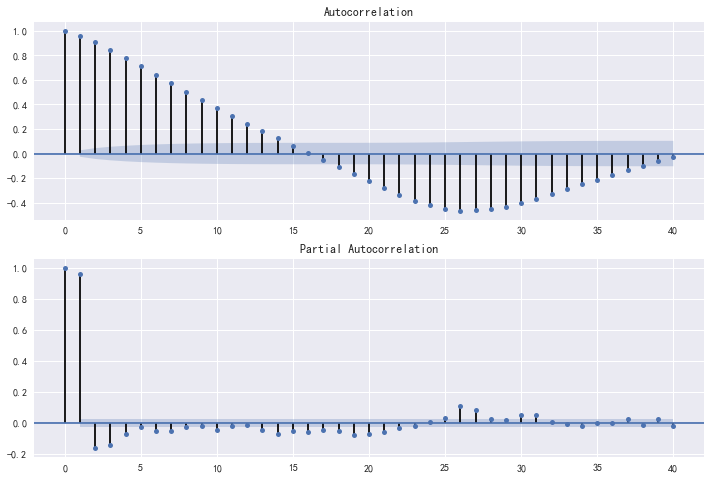

In [85]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

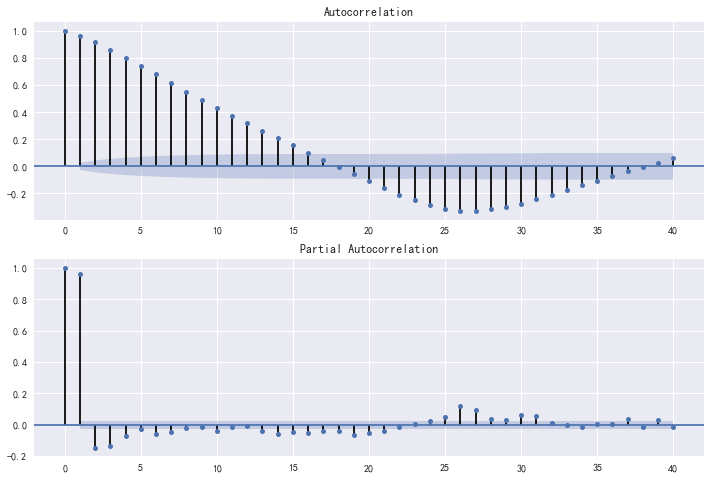

In [86]:
dta = dd_new['Sub']
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

## 分月份Sub图

No handles with labels found to put in legend.


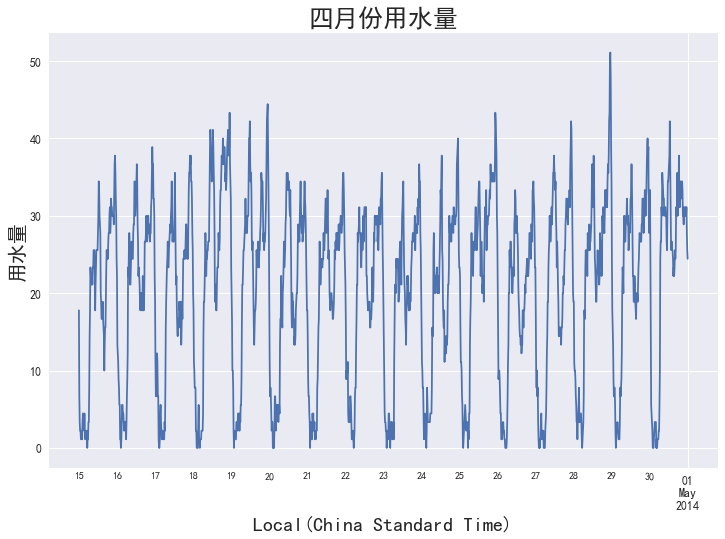

In [87]:
dta1 = dd_new.loc['2014/4':'2014/4','Sub']
plt.figure(figsize=(12,8))
plt.title('四月份用水量',fontsize=25)
plt.ylabel('用水量',fontsize=20)
plt.xlabel('时间',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
dta1.plot()
plt.savefig('4.png',dpi=200)

No handles with labels found to put in legend.


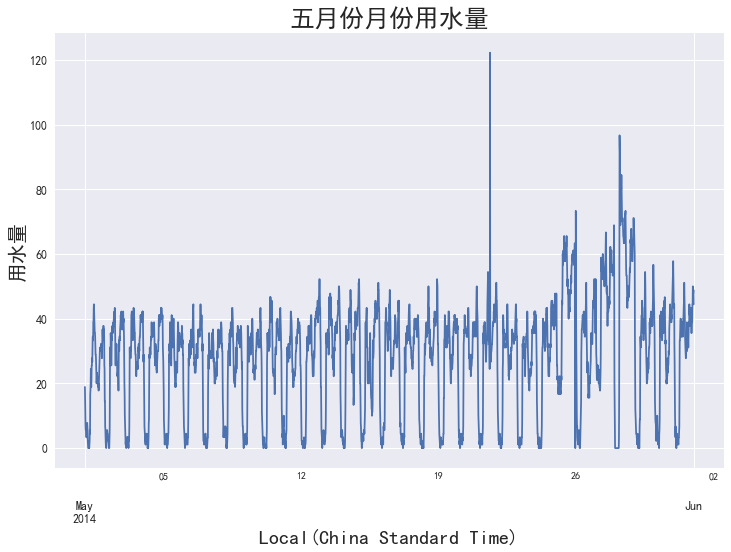

In [88]:
dta1 = dd_new.loc['2014/5':'2014/5','Sub']
plt.figure(figsize=(12,8))
plt.title('五月份月份用水量',fontsize=25)
plt.ylabel('用水量',fontsize=20)
plt.xlabel('时间',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
dta1.plot()
plt.savefig('5.png',dpi=200)

No handles with labels found to put in legend.


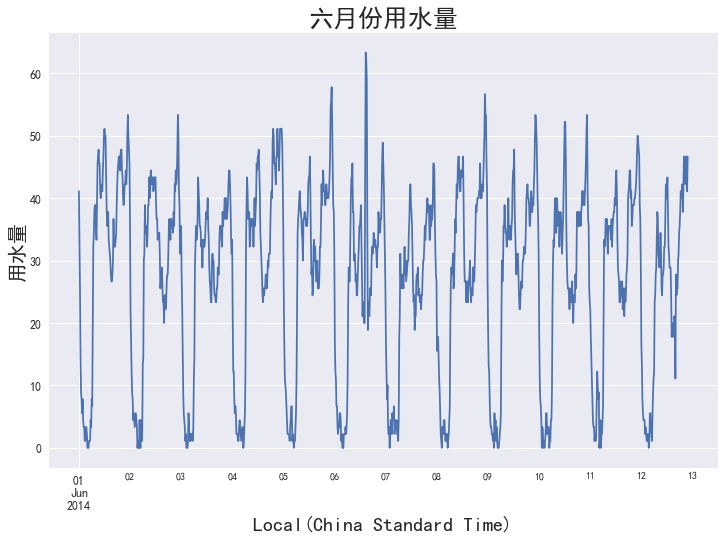

In [89]:
dta1 = dd_new.loc['2014/6':'2014/6','Sub']
plt.figure(figsize=(12,8))
plt.title('六月份用水量',fontsize=25)
plt.ylabel('用水量',fontsize=20)
plt.xlabel('时间',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
dta1.plot()
plt.savefig('6.png',dpi=200)

## 处理前箱型图

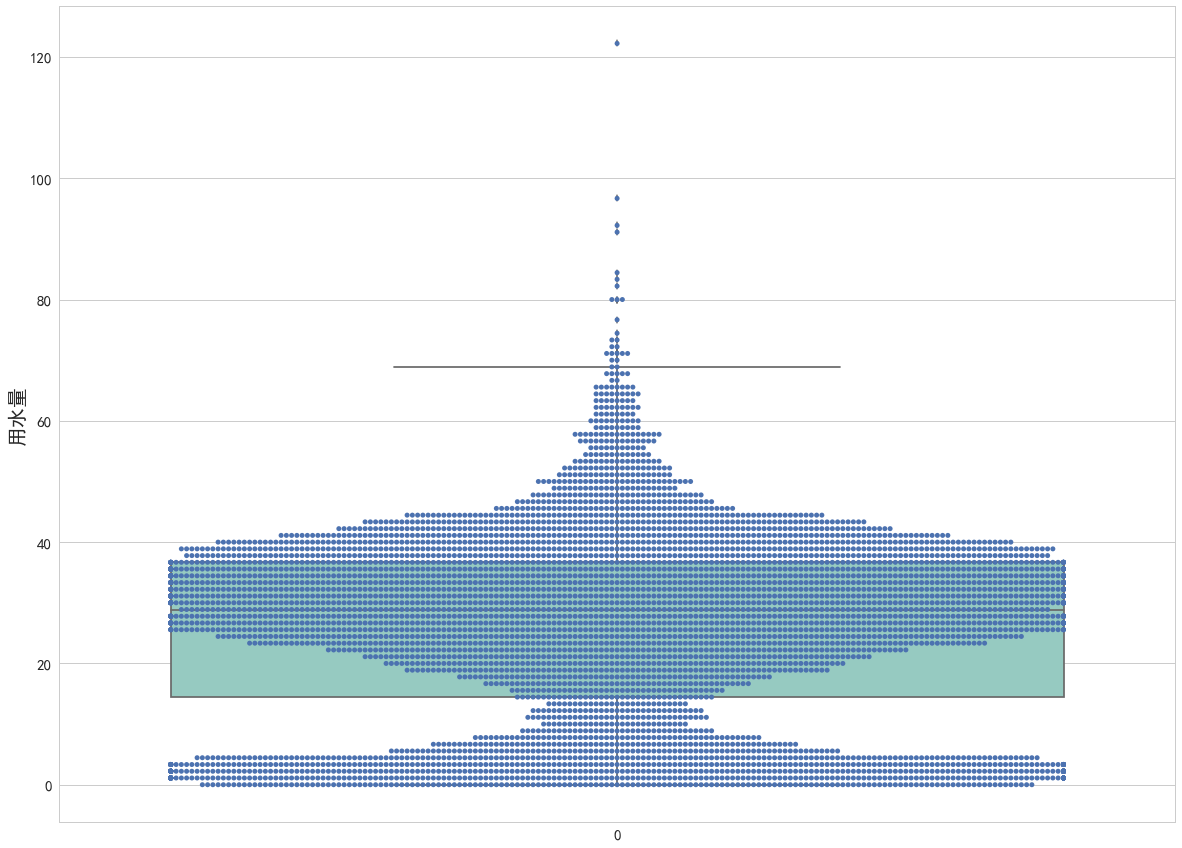

In [90]:
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文标题 
plt.rcParams['axes.unicode_minus'] = False # 正常显示正负号 
dta = dd_new['Sub']
plt.figure(figsize=(20,15))
x = sns.swarmplot(data=dta)
plt.ylabel('用水量',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax = sns.boxplot(data=dta, palette='Set3')
plt.savefig('x1.png',dpi=200)

## 异常值处理

In [139]:
def YC(diff2):
    # 传入异常列，返回删除异常值后的列
    dif2 = DataFrame(diff2.dropna())
    des = DataFrame(dif2.describe())
    print("上界"+"\t\t下界")
    Shang = []
    Xia = []
    for i in range(1):
        Q1 = des.iloc[4,i]
        Q2 = des.iloc[5,i]
        Q3 = des.iloc[6,i]
        cha = Q3 - Q1
        shang = Q2 + 1.5*cha
        xia = Q2 - 1.5*cha
        Shang.append(shang)
        Xia.append(xia)
        print(str(shang), end="\t\t")
        print(xia)

    dif2_dt = dif2.index
    dif2['dt'] = dif2_dt
    dif2.index = Series(np.arange((dif2.shape)[0]))

    dellist = []
    for i in range((dif2.shape)[0]):
        now = dif2.iloc[i,0]
        if now>Shang[0] or now<Xia[0]:
            dellist.append(i)
    print(dellist)
    dif2 = dif2.drop(dellist)#删除
    dif2.index = dif2['dt']
    del dif2['dt']
    return dif2

In [140]:
new_dta = YC(dta)

上界		下界
78.33500000000001		21.665
[1552, 1553, 1554, 1555, 1557, 1638, 1639, 1640, 1641, 1652, 1653, 1654, 1655, 1735, 1737, 1738, 1739, 1747, 1748, 1749, 1750, 1830, 1832, 1833, 1834, 1841, 1842, 1843, 1844, 1845, 1846, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2128, 2129, 2133, 2227, 2228, 2230, 2310, 2311, 2312, 2313, 2314, 2315, 2316, 2317, 2322, 2323, 2324, 2326, 2327, 2406, 2408, 2409, 2410, 2414, 2415, 2416, 2417, 2418, 2419, 2420, 2421, 2422, 2423, 2503, 2514, 2516, 2517, 2518, 2597, 2598, 2601, 2602, 2603, 2606, 2609, 2610, 2611, 2612, 2613, 2614, 2695, 2696, 2697, 2699, 2700, 2705, 2707, 2709, 2710, 2801, 2803, 2804, 2805, 2806, 2983, 2984, 2987, 2988, 2992, 2993, 2994, 3082, 3083, 3084, 3085, 3090, 3091, 3092, 3093, 3094, 3095, 3173, 3174, 3175, 3176, 3177, 3178, 3180, 3181, 3182, 3183, 3184, 3185, 3186, 3187, 

In [141]:
def GYC(diff2):
    # 传入异常列，返回删除异常值后的列
    dif2 = DataFrame(diff2.dropna())
    des = DataFrame(dif2.describe())
    print("上界"+"\t\t下界")
    Shang = []
    Xia = []
    for i in range(1):
        Q1 = des.iloc[4,i]
        Q2 = des.iloc[5,i]
        Q3 = des.iloc[6,i]
        cha = Q3 - Q1
        shang = Q2 + 1.5*cha
        xia = Q2 - 1.5*cha
        Shang.append(shang)
        Xia.append(xia)
        print(str(shang), end="\t\t")
        print(xia)

    dif2_dt = dif2.index
    dif2['dt'] = dif2_dt
    dif2.index = Series(np.arange((dif2.shape)[0]))

    dellist = []
    for i in range((dif2.shape)[0]):
        now = dif2.iloc[i,0]
        if now>Shang[0] or now<Xia[0]:
            dellist.append(i)
    print(dellist)
    dif2 = dif2.iloc[dellist,:]
    dif2.index = dif2['dt']
    del dif2['dt']
    return dif2

In [145]:
dta = dd_new['Sub']

In [146]:
ycz = GYC(dta)

上界		下界
62.22		-4.439999999999998
[3516, 3878, 3883, 3890, 3930, 3935, 4082, 4121, 4122, 4149, 4150, 4151, 4152, 4153, 4154, 4155, 4156, 4157, 4158, 4159, 4160, 4161, 4162, 4163, 4164, 4165, 4166, 4167, 4168, 4169, 4170, 4171, 4172, 4173, 4174, 4175, 4176, 4177, 4178, 4179, 4180, 4202, 4203, 4204, 4205, 4206, 4207, 4214, 4215, 4216, 4217, 4218, 4219, 4220, 4221, 4222, 5051]


In [150]:
ycz.to_excel('ycy.xls')

## 异常值处理后Sub图

In [93]:
def X_t(dta):
    plt.figure(figsize=(20,15))
    x = sns.swarmplot(data=dta)
    plt.ylabel('用水量',fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax = sns.boxplot(data=dta, palette='Set3')
    plt.savefig('x2.png',dpi=200)

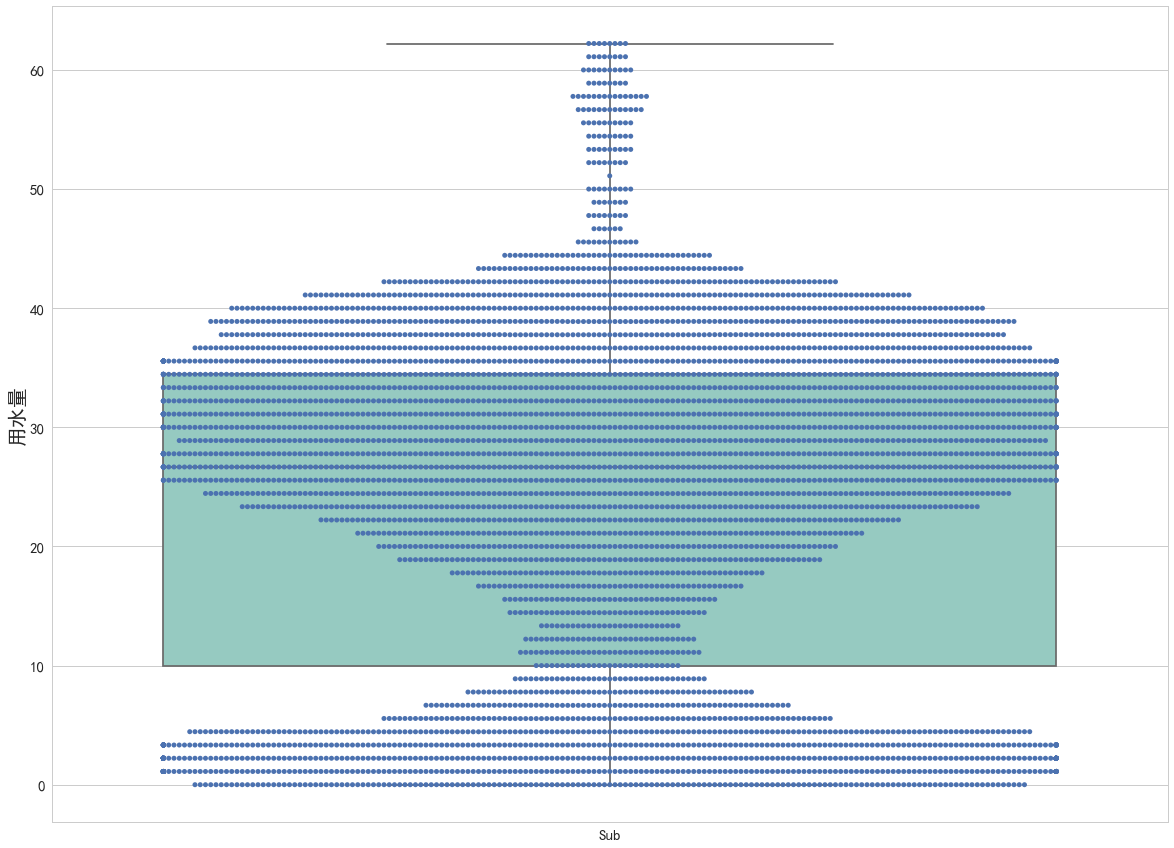

In [94]:
X_t(new_dta)

# 吴楚鹏的代码封装

In [95]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.graphics.tsaplots import acf,pacf,plot_acf,plot_pacf 
from statsmodels.tsa.arima_model import ARMA,ARIMA
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.stattools import adfuller as ADF 
def dif_0(dta):
    # 原始数据
    print('原始序列的检验结果为：',adfuller(dta))
    plt.figure(figsize=(12,8)) 
    plt.title('原始Sub时序图',fontsize=25)
    plt.ylabel('Sub_原始数据',fontsize=20)
    plt.xlabel('当地时间',fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    dta.plot()
    plt.savefig('dif0.png',dpi=200)
    
def dif_1(dta):
    # 一阶差分
    fig = plt.figure(figsize=(12,8)) 
    plt.title('一阶差分Sub时序图',fontsize=25)
    plt.ylabel('Sub_一阶差分数据',fontsize=20)
    plt.xlabel('当地时间',fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax1= fig.add_subplot(111) 
    diff1 = dta.diff(1) 
    diff1.plot(ax=ax1)
    print('一阶差分后的检验结果:')
    print(adfuller(diff1.dropna())) 
    plt.savefig('dif1.png',dpi=200)
    
def dif_2(dta):
    # 二阶差分
    fig = plt.figure(figsize=(12,8)) 
    plt.title('二阶差分Sub时序图',fontsize=25)
    plt.ylabel('Sub_二阶差分数据',fontsize=20)
    plt.xlabel('当地时间',fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax1= fig.add_subplot(111) 
    diff2 = dta.diff(2) 
    diff2.plot(ax=ax1)
    print('二阶差分后的检验结果:')
    print(adfuller(diff2.dropna()))    
    plt.savefig('dif2.png',dpi=200)
    
def pcf_pacf_0(dta):
    #不做差分的 PCF 和 PCAF图
    print('不做差分的 PCF 和 PCAF图')
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(dta, lags=40, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
    plt.savefig('pcf_pacf_0.png',dpi=200)
    
def pcf_pacf_1(dta):
    #一阶差分的 PCF 和 PCAF图
    print('一阶差分的 PCF 和 PCAF图')
    dta1 = dta.diff(1) 
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(dta1, lags=40, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(dta1, lags=40, ax=ax2)
    plt.savefig('pcf_pacf_1.png',dpi=200)
    
    
def pcf_pacf_2(dta):
    #二阶差分的 PCF 和 PCAF图
    print('二阶差分的 PCF 和 PCAF图')
    dta2 = dta.diff(2) 
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(dta2, lags=40, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(dta2, lags=40, ax=ax2)
    plt.savefig('pcf_pacf_2.png',dpi=200)
    
def adf_0(dta):
    print('原始序列的ADF检验结果为:', ADF(dta.dropna()))
    
def adf_1(dta):
    # 一阶差分后的dta
    dta1 = dta.diff(1)
    print('一阶差分后的ADF检验结果为:', ADF(dta1.dropna()))
    
def adf_2(dta):
    # 二阶差分后的dta
    dta2 = dta.diff(2)
    print('二阶差分后的ADF检验结果为:', ADF(dta2.dropna()))

## 宁静的差分
### 修改名字

In [96]:
new_dta['当地标准时间'] = new_dta.index
new_dta.index = new_dta['当地标准时间']

In [97]:
a = new_dta['Sub']

In [98]:
print('原始序列的ADF检验结果为:', ADF(a))

原始序列的ADF检验结果为: (-10.185131662817026, 6.5388402155957046e-18, 33, 5118, {'1%': -3.431628347563363, '5%': -2.862104894256522, '10%': -2.567070693405081}, 26689.52894286455)


原始序列的检验结果为： (-10.185131662817026, 6.5388402155957046e-18, 33, 5118, {'1%': -3.431628347563363, '5%': -2.862104894256522, '10%': -2.567070693405081}, 26689.52894286455)


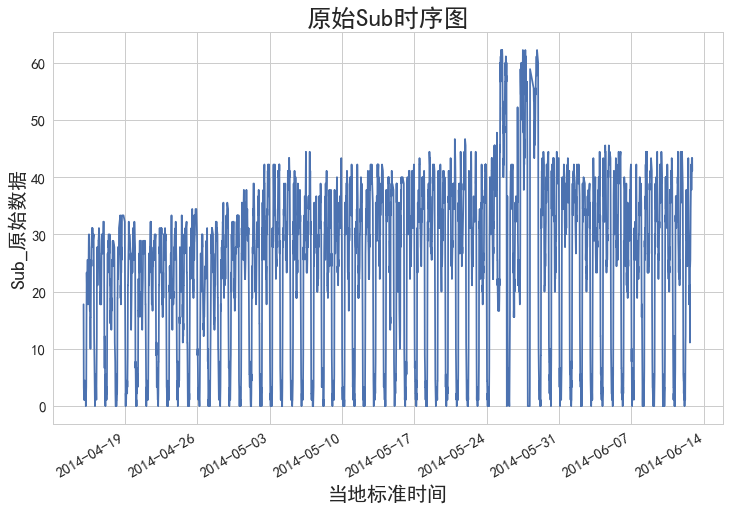

In [99]:
dif_0(a)

D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


一阶差分后的检验结果:
(-21.27141158125795, 0.0, 31, 5119, {'1%': -3.4316280977119353, '5%': -2.8621047838723723, '10%': -2.567070634643483}, 26785.13095015259)


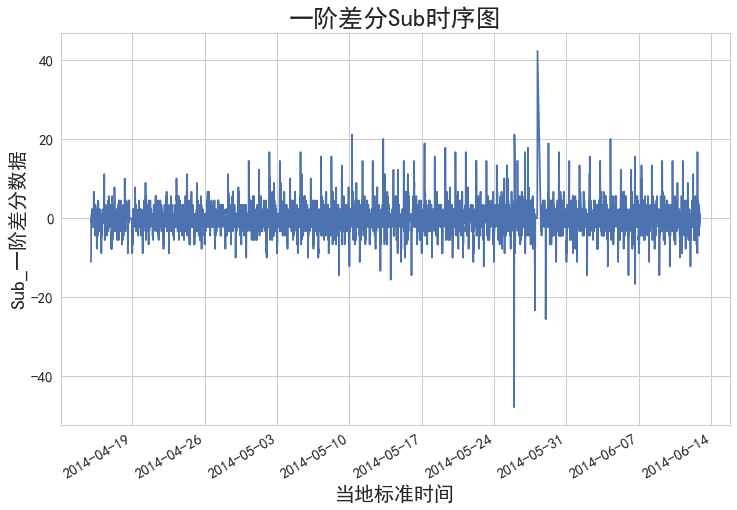

In [100]:
dif_1(a)

D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


二阶差分后的检验结果:
(-21.27141158125795, 0.0, 31, 5119, {'1%': -3.4316280977119353, '5%': -2.8621047838723723, '10%': -2.567070634643483}, 26785.13095015259)


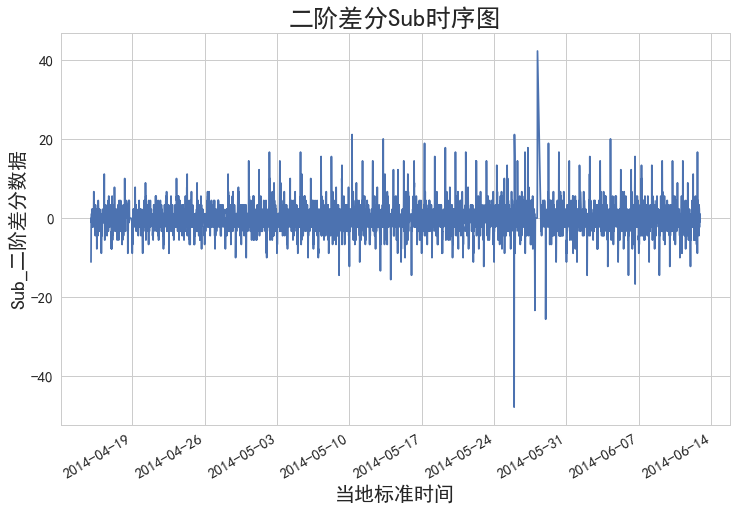

In [101]:
dif_2(a)

In [102]:
adf_0(a)
adf_1(a)
adf_2(a)

原始序列的ADF检验结果为: (-10.185131662817026, 6.5388402155957046e-18, 33, 5118, {'1%': -3.431628347563363, '5%': -2.862104894256522, '10%': -2.567070693405081}, 26689.52894286455)
一阶差分后的ADF检验结果为: (-21.27141158125795, 0.0, 31, 5119, {'1%': -3.4316280977119353, '5%': -2.8621047838723723, '10%': -2.567070634643483}, 26785.13095015259)
二阶差分后的ADF检验结果为: (-20.97067605371598, 0.0, 30, 5119, {'1%': -3.4316280977119353, '5%': -2.8621047838723723, '10%': -2.567070634643483}, 26923.663093074712)


不做差分的 PCF 和 PCAF图


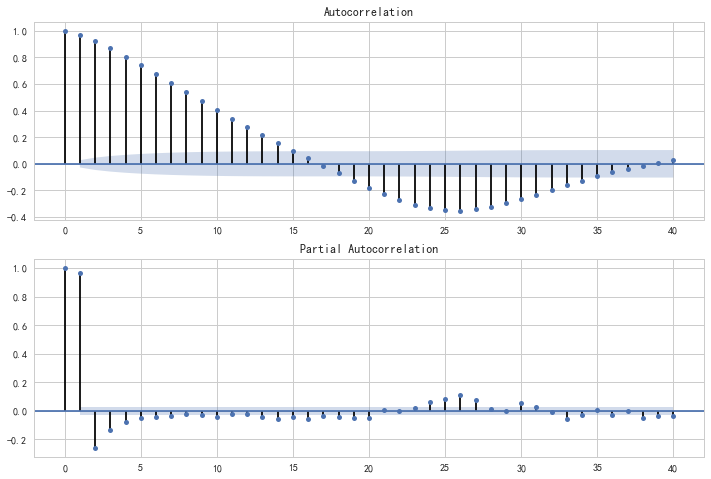

In [103]:
pcf_pacf_0(a)

## 取 p=1, q=2。进行模型估计,结果见下图。

In [104]:
p,d,q = (1,1,2)
arma_mod = ARMA(a,(p,d,q)).fit(disp=-1,method='mle')
summary = (arma_mod.summary2(alpha=.05, float_format="%.8f"))
print(summary)

D:\ruanjian\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Results: ARMA
Model:              ARMA             BIC:                 27368.5560
Dependent Variable: Sub              Log-Likelihood:      -13667.   
Date:               2018-08-22 17:54 Scale:               1.0000    
No. Observations:   5152             Method:              mle       
Df Model:           3                Sample:              0         
Df Residuals:       5149                                  2         
Converged:          1.0000           S.D. of innovations: 3.433     
No. Iterations:     16.0000          HQIC:                27351.532 
AIC:                27342.3674                                      
----------------------------------------------------------------------
             Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
----------------------------------------------------------------------
const       24.0015     1.3532    17.7369   0.0000   21.3493   26.6538
ar.L1.Sub    0.9574     0.0041   233.3017   0.0000    

## 定阶（3,3）自动获取最佳p,q值

In [105]:
(p, q) =(sm.tsa.arma_order_select_ic(dta,max_ar=3,max_ma=3,ic='aic')['aic_min_order'])
#这里需要设定自动取阶的 p和q 的最大值，即函数里面的max_ar,和max_ma。ic 参数表示选用的选取标准，这里设置的为aic,当然也可以用bic。然后函数会算出每个 p和q 组合(这里是(0,0)~(3,3)的AIC的值，取其中最小的,这里的结果是(p=0,q=1)。

D:\ruanjian\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  % freq, ValueWarning)
D:\ruanjian\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  % freq, ValueWarning)
D:\ruanjian\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  % freq, ValueWarning)
D:\ruanjian\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  % freq, ValueWarning)
D:\ruanjian\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  % freq, ValueWarning)
D:\ruanjian\Anaconda

## 最佳p，q

In [106]:
p,q

(2, 3)

## p为2，q为1， d为1    残差和白噪声检验

In [107]:
arma_mod = ARMA(a,(2,1,3)).fit(disp=-1,method='mle')
resid = arma_mod.resid
t=sm.tsa.stattools.adfuller(resid)
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
print(output)

D:\ruanjian\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                   value
Test Statistic Value            -15.9918
p-value                      6.65835e-29
Lags Used                             32
Number of Observations Used         5119
Critical Value(1%)              -3.43163
Critical Value(5%)               -2.8621
Critical Value(10%)             -2.56707


In [108]:
arma_mod = ARMA(a,(2,0,3)).fit(disp=-1,method='mle')
summary = (arma_mod.summary2(alpha=.05, float_format="%.8f"))
print(summary)

D:\ruanjian\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Results: ARMA
Model:              ARMA             BIC:                 27286.9578
Dependent Variable: Sub              Log-Likelihood:      -13626.   
Date:               2018-08-22 17:54 Scale:               1.0000    
No. Observations:   5152             Method:              mle       
Df Model:           3                Sample:              0         
Df Residuals:       5149                                  2         
Converged:          1.0000           S.D. of innovations: 3.406     
No. Iterations:     20.0000          HQIC:                27269.934 
AIC:                27260.7692                                      
----------------------------------------------------------------------
             Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
----------------------------------------------------------------------
const       23.9960     1.2178    19.7039   0.0000   21.6091   26.3828
ar.L1.Sub    1.2193     0.0135    90.5205   0.0000    

In [109]:
a

当地标准时间
2014-04-15 00:00:00    17.78
2014-04-15 00:15:00     6.67
2014-04-15 00:30:00     3.33
2014-04-15 00:45:00     2.22
2014-04-15 01:00:00     2.22
2014-04-15 01:15:00     1.11
2014-04-15 01:30:00     1.11
2014-04-15 01:45:00     2.22
2014-04-15 02:00:00     1.11
2014-04-15 02:15:00     3.33
2014-04-15 02:30:00     4.45
2014-04-15 02:45:00     3.33
2014-04-15 03:00:00     3.33
2014-04-15 03:15:00     2.22
2014-04-15 03:30:00     4.45
2014-04-15 03:45:00     2.22
2014-04-15 04:00:00     1.11
2014-04-15 04:15:00     2.22
2014-04-15 04:30:00     2.22
2014-04-15 04:45:00     1.11
2014-04-15 05:00:00     2.22
2014-04-15 05:15:00     0.00
2014-04-15 05:30:00     1.11
2014-04-15 05:45:00     1.11
2014-04-15 06:00:00     3.33
2014-04-15 06:15:00     3.33
2014-04-15 06:30:00     7.78
2014-04-15 06:45:00    14.45
2014-04-15 07:00:00    17.78
2014-04-15 07:15:00    23.33
                       ...  
2014-06-12 13:45:00    28.89
2014-06-12 14:00:00    28.89
2014-06-12 14:15:00    24.44
2014-06

## 预测模型

In [110]:
model = ARIMA(a, (2,0,3)).fit()
model.summary2()

D:\ruanjian\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
====================================================================
Model:              ARMA             BIC:                 27107.0704
Dependent Variable: Sub              Log-Likelihood:      -13524.   
Date:               2018-08-22 17:54 Scale:               1.0000    
No. Observations:   5152             Method:              css-mle   
Df Model:           6                Sample:              0         
Df Residuals:       5146                                  2         
Converged:          1.0000           S.D. of innovations: 3.339     
No. Iterations:     20.0000          HQIC:                27077.279 
AIC:                27061.2404                                      
----------------------------------------------------------------------
             Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
----------------------------------------------------------------------
const       23.9842     0.5838    41.0843   0.0000   22.8400   25.1284
ar.L1.Sub    1.9064     0.0103   184.3393   0.0000    1.8861    1.9266
ar.L2.Sub   -0.9176     0.0097   -95.0350   0.0000   -0.9365   -0.8987
ma.L1.Sub   -0.7522     0.0174   -43.1941   0.0000   -0.7863   -0.7181
ma.L2.Sub   -0.0551     0.0180    -3.0552   0.0023   -0.0905   -0.0198
ma.L3.Sub   -0.0517     0.0147    -3.5096   0.0005   -0.0806   -0.0228
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1            1.0388            -0.1036           1.0439            -0.0158
AR.2            1.0388             0.1036           1.0439             0.0158
MA.1            1.1347            -0.0000           1.1347            -0.0000
MA.2           -1.1007            -3.9798           4.1292            -0.2929
MA.3           -1.1007             3.9798           4.1292             0.2929
====================================================================

"""

## 预测结果， 标准误差，置信区间

In [111]:
pre = model.forecast(96)

In [120]:
YC = pre[0]
YC_df = pd.date_range('2014/6/12 22:15:00',periods=96,freq='15min')
print(YC_df)

DatetimeIndex(['2014-06-12 22:15:00', '2014-06-12 22:30:00',
               '2014-06-12 22:45:00', '2014-06-12 23:00:00',
               '2014-06-12 23:15:00', '2014-06-12 23:30:00',
               '2014-06-12 23:45:00', '2014-06-13 00:00:00',
               '2014-06-13 00:15:00', '2014-06-13 00:30:00',
               '2014-06-13 00:45:00', '2014-06-13 01:00:00',
               '2014-06-13 01:15:00', '2014-06-13 01:30:00',
               '2014-06-13 01:45:00', '2014-06-13 02:00:00',
               '2014-06-13 02:15:00', '2014-06-13 02:30:00',
               '2014-06-13 02:45:00', '2014-06-13 03:00:00',
               '2014-06-13 03:15:00', '2014-06-13 03:30:00',
               '2014-06-13 03:45:00', '2014-06-13 04:00:00',
               '2014-06-13 04:15:00', '2014-06-13 04:30:00',
               '2014-06-13 04:45:00', '2014-06-13 05:00:00',
               '2014-06-13 05:15:00', '2014-06-13 05:30:00',
               '2014-06-13 05:45:00', '2014-06-13 06:00:00',
               '2014-06-

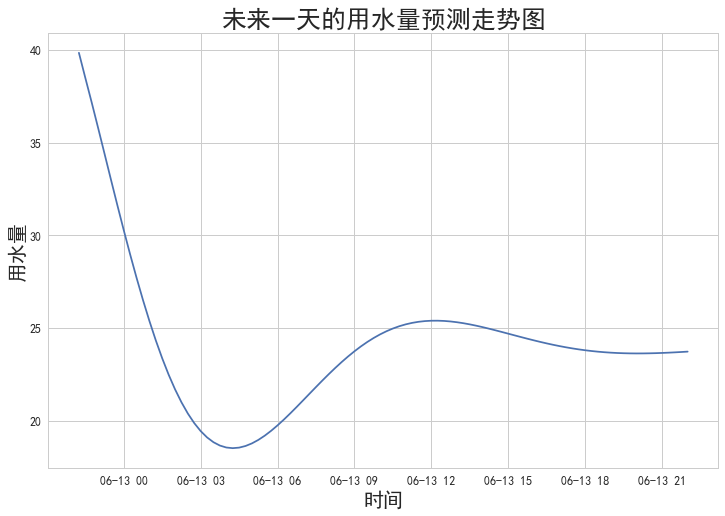

In [121]:
yc_df = DataFrame(index=YC_df, data=YC)
plt.figure(figsize=(12,8))
plt.title('未来一天的用水量预测走势图',fontsize=25)
plt.ylabel('用水量',fontsize=20)
plt.xlabel('时间',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend('预测线')
plt.plot(yc_df)
plt.savefig('预测.png',dpi=200)